# 1. 資料簡介

## 1.1. 讀取資料與導入套件

In [1]:
# 導入所需套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定介面與字型
plt.style.use('ggplot')
## 正常顯示中文為標楷體
plt.rcParams['font.family'] = 'DFKai-SB'
## 用來正常顯示負號
plt.rcParams['axes.unicode_minus'] = False 

# 設定展示欄位最大值
pd.set_option("display.max_columns", 100) 

# 載入資料集
train_data = pd.read_csv('./data/train_data.csv')
test_features = pd.read_csv('./data/test_features.csv')

# 列出訓練資料集前10筆
train_data.head(10)

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,HIRKO JOSEPH,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,NaN,NaN,NaN,2856.0,True,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,NaN,NaN,NaN,147950.0,True,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,COLWELL WESLEY,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,11.0,NaN,NaN,101740.0,True,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,GLISAN JR BEN F,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,6.0,NaN,71023.0,200308.0,True,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


In [2]:
# 列出測試資料集前10筆
test_features.head(10)

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,15.0,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,609.0,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,12.0,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0
5,HICKERSON GARY J,1700000.0,NaN,NaN,NaN,gary.hickerson@enron.com,NaN,98849.0,27.0,40.0,1.0,NaN,69223.0,1936.0,441096.0,NaN,211788.0,900.0,1320.0,2081796.0,441096.0
6,FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,6.0,2000000.0,1617011.0,7427621.0,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
7,CHAN RONNIE,NaN,NaN,-98784.0,98784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32460.0,-32460.0,NaN,NaN,NaN,NaN,NaN
8,DONAHUE JR JEFFREY M,800000.0,NaN,-300000.0,NaN,jeff.donahue@enron.com,765920.0,96268.0,22.0,188.0,11.0,NaN,NaN,891.0,315068.0,NaN,278601.0,772.0,865.0,875760.0,1080988.0
9,REYNOLDS LAWRENCE,100000.0,51365.0,-200000.0,NaN,NaN,4160672.0,8409.0,NaN,NaN,NaN,NaN,156250.0,202052.0,201483.0,-140264.0,76399.0,NaN,NaN,394475.0,4221891.0


## 1.2. 資料的特徵、類型與尺寸

In [3]:
print(f'train_data dtypes:\n{train_data.dtypes}')
print(f'\ntrain_data shape: {train_data.shape}')
print(f'\ntest_features shape: {test_features.shape}')

train_data dtypes:
name                          object
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

train_data shape: (113, 22)

test_features shape: (33, 21)


## 1.3. 分析目標
#### 可以發現test資料集比起train資料集少了poi這個欄位，此專案是藉由mail來往的情報以及薪資、股票等財務特徵來預測犯罪者 (Person-of-Interest, poi)，True表示是，False表示否。最後要輸出是犯罪者的機率並儲存為.csv檔為結果上傳。

# 2. 數據清洗

## 2.1. 移除無法作為特徵的欄位
#### 由於姓名沒有職稱(Mr. Misss.等稱謂)，email也沒有特別之處，所以先將其提出。

In [4]:
train_name = train_data['name']
train_email_address = train_data['email_address']
test_name = test_features['name']
test_email_address = test_features['email_address']

# 顯示剩餘資料集尺寸
y_train = train_data['poi']
train_data = train_data.drop(['name', 'email_address', 'poi'], axis = 1)
test_features = test_features.drop(['name', 'email_address'], axis = 1)
print('train_data shape', train_data.shape)
print('y_train shape', y_train.shape)
print('test_features shape', test_features.shape)

# 合併 train & test 資料集
X = pd.concat([train_data, test_features], ignore_index = True)

# 觀察填補後資料集的前10筆
X.head(10)

train_data shape (113, 19)
y_train shape (113,)
test_features shape (33, 19)


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,NaN,10259.0,NaN,NaN,30766064.0,77978.0,NaN,NaN,NaN,NaN,NaN,2856.0,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,NaN,NaN,NaN,NaN,8308552.0,53947.0,NaN,NaN,NaN,NaN,NaN,147950.0,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,1200000.0,27610.0,-144062.0,NaN,NaN,16514.0,40.0,240.0,11.0,NaN,NaN,101740.0,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,202911.0,-300000.0,NaN,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,3600000.0,10359729.0,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,600000.0,NaN,NaN,NaN,384728.0,125978.0,16.0,52.0,6.0,NaN,71023.0,200308.0,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


In [5]:
# 觀察欄位型態
print(f'\ndtypes of each columns:\n{X.dtypes}')
# 觀察空值數
print(f'\nnumbers of NaN:\n{X.isnull().sum()}')
# 觀察相異數
print(f'\nnumbers of nunique:\n{X.nunique()}')


dtypes of each columns:
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

numbers of NaN:
bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_t

# 2.2. 離群值、偏態檢測

Text(0.5, 1.0, 'total_stock_value')

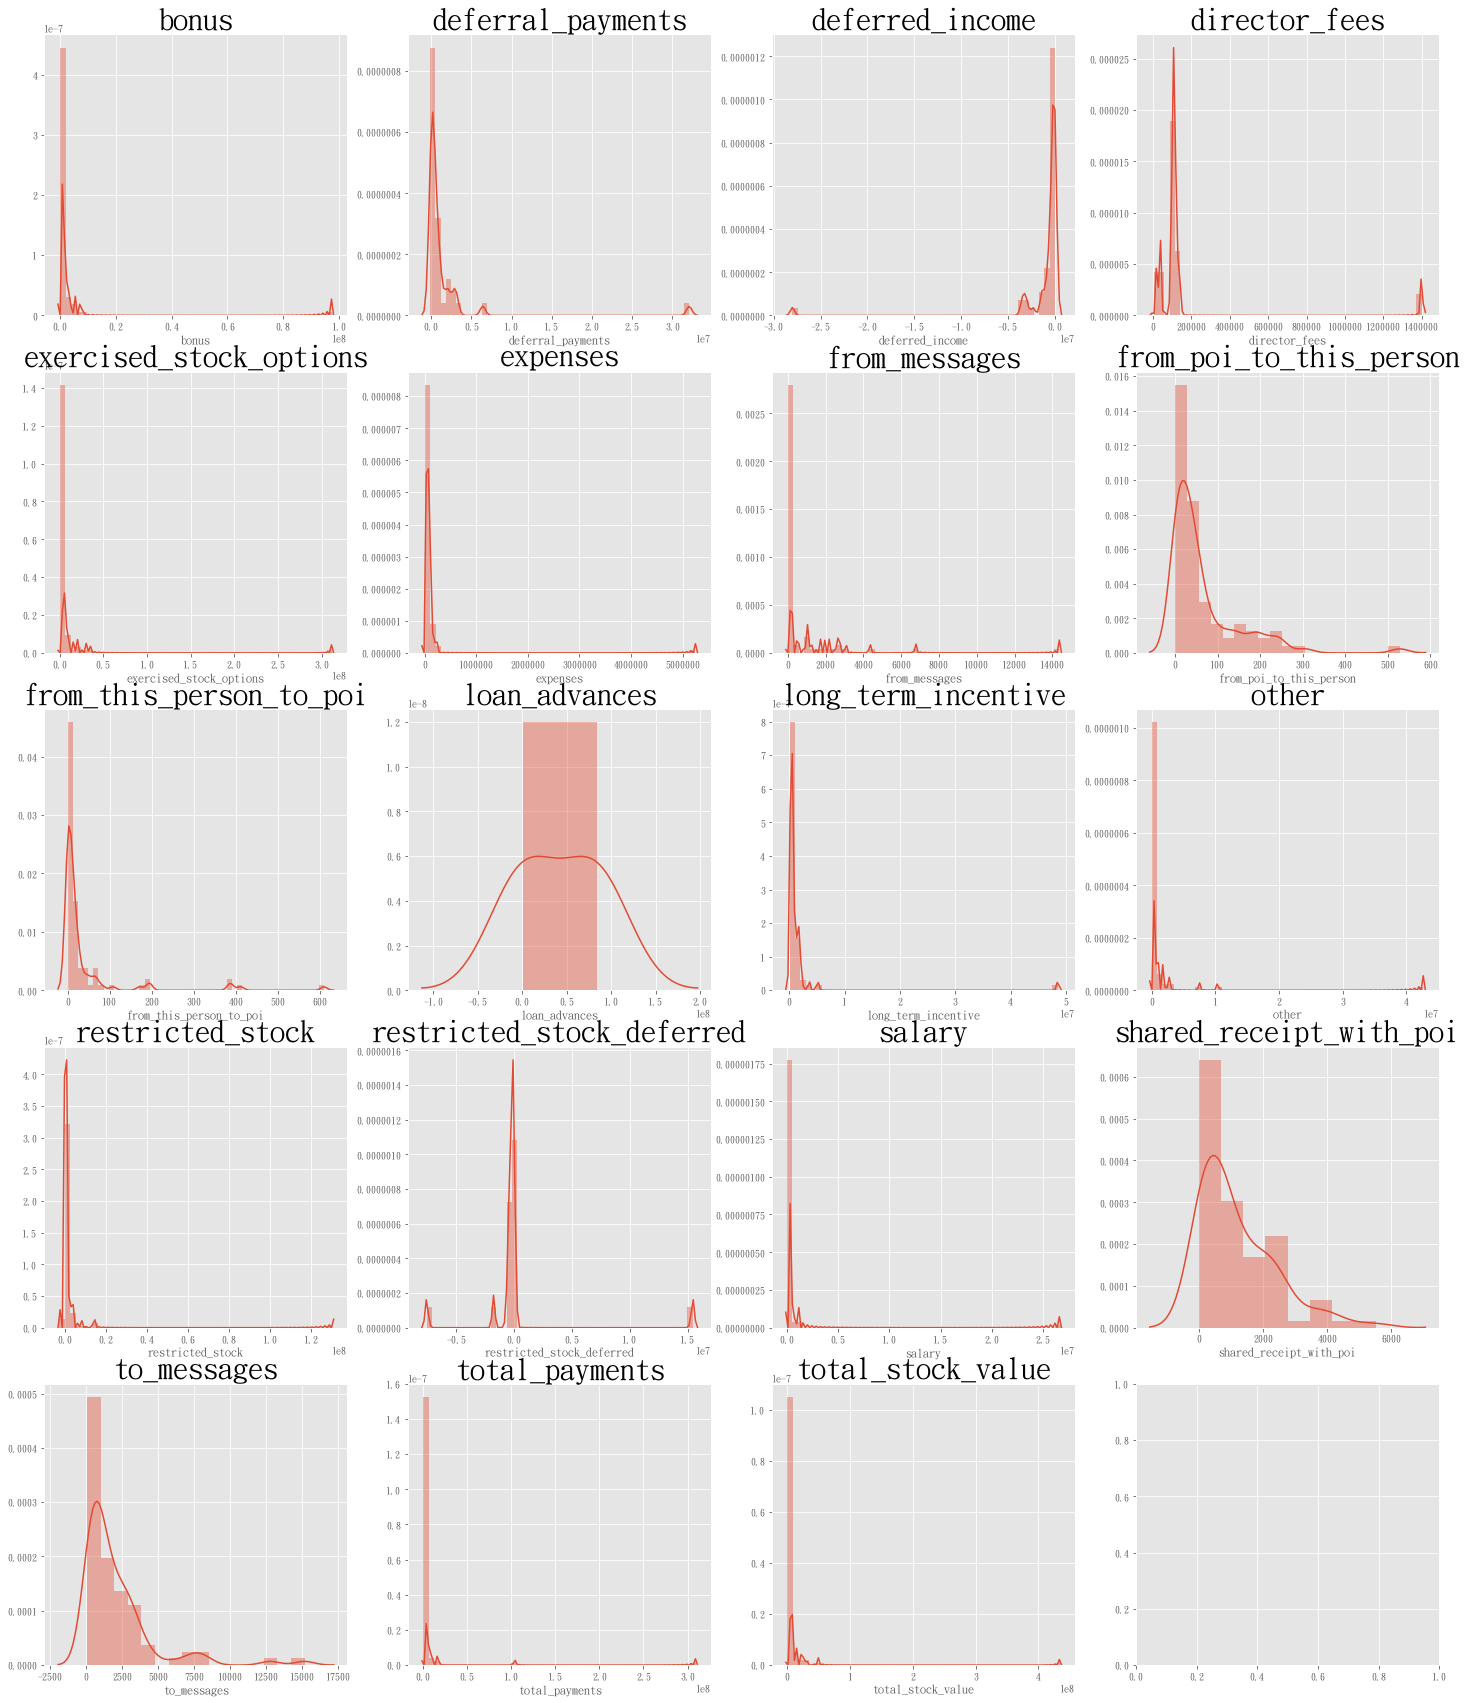

In [6]:
# 觀察特徵值
f, ax = plt.subplots(5,4, figsize=(25, 30))
sns.distplot(X['bonus'].dropna(), ax = ax[0, 0])
sns.distplot(X['deferral_payments'].dropna(), ax = ax[0, 1])
sns.distplot(X['deferred_income'].dropna(), ax = ax[0, 2])
sns.distplot(X['director_fees'].dropna(), ax = ax[0, 3])
sns.distplot(X['exercised_stock_options'].dropna(), ax = ax[1, 0])
sns.distplot(X['expenses'].dropna(), ax = ax[1, 1])
sns.distplot(X['from_messages'].dropna(), ax = ax[1, 2])
sns.distplot(X['from_poi_to_this_person'].dropna(), ax = ax[1, 3])
sns.distplot(X['from_this_person_to_poi'].dropna(), ax = ax[2, 0])
sns.distplot(X['loan_advances'].dropna(), ax = ax[2, 1])
sns.distplot(X['long_term_incentive'].dropna(), ax = ax[2, 2])
sns.distplot(X['other'].dropna(), ax = ax[2, 3])
sns.distplot(X['restricted_stock'].dropna(), ax = ax[3, 0])
sns.distplot(X['restricted_stock_deferred'].dropna(), ax = ax[3, 1])
sns.distplot(X['salary'].dropna(), ax = ax[3, 2])
sns.distplot(X['shared_receipt_with_poi'].dropna(), ax = ax[3, 3])
sns.distplot(X['to_messages'].dropna(), ax = ax[4, 0])
sns.distplot(X['total_payments'].dropna(), ax = ax[4, 1])
sns.distplot(X['total_stock_value'].dropna(), ax = ax[4, 2])

ax[0,0].set_title('bonus', fontsize = 30)
ax[0,1].set_title('deferral_payments', fontsize = 30)
ax[0,2].set_title('deferred_income', fontsize = 30)
ax[0,3].set_title('director_fees', fontsize = 30)
ax[1,0].set_title('exercised_stock_options', fontsize = 30)
ax[1,1].set_title('expenses', fontsize = 30)
ax[1,2].set_title('from_messages', fontsize = 30)
ax[1,3].set_title('from_poi_to_this_person', fontsize = 30)
ax[2,0].set_title('from_this_person_to_poi', fontsize = 30)
ax[2,1].set_title('loan_advances', fontsize = 30)
ax[2,2].set_title('long_term_incentive', fontsize = 30)
ax[2,3].set_title('other', fontsize = 30)
ax[3,0].set_title('restricted_stock', fontsize = 30)
ax[3,1].set_title('restricted_stock_deferred', fontsize = 30)
ax[3,2].set_title('salary', fontsize = 30)
ax[3,3].set_title('shared_receipt_with_poi', fontsize = 30)
ax[4,0].set_title('to_messages', fontsize = 30)
ax[4,1].set_title('total_payments', fontsize = 30)
ax[4,2].set_title('total_stock_value', fontsize = 30)

In [7]:
# 在這邊觀察到'restricted_stock_deferred'有正的值，推測應該是忘記輸入負號，所以先將他修正
X.loc[X['restricted_stock_deferred'] > 0, 'restricted_stock_deferred'] *= -1.0

In [8]:
# 先去離群值
for col in X.columns:
    Q1 = X.loc[X[col].notna(), col].quantile(0.25)
    Q3 = X.loc[X[col].notna(), col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X.loc[X[col].notna(), col] = X.loc[(X[col].notna()), col].clip(lower, upper)

# 由上圖可以知道除了'loan_advances'以外的特徵都為偏態
features_Skewness = ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 
                     'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 
                     'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 
                     'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

# 去偏態
for col in X.columns:
    if col in features_Skewness and col in ['deferred_income', 'restricted_stock_deferred']:
        X.loc[X[col].notna(), col] = -1.0 * np.log1p(-1.0 * X.loc[X[col].notna(), col])
    elif col in features_Skewness:
        X.loc[X[col].notna(), col] = np.log1p(X.loc[X[col].notna(), col])

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log1p


Text(0.5, 1.0, 'total_stock_value')

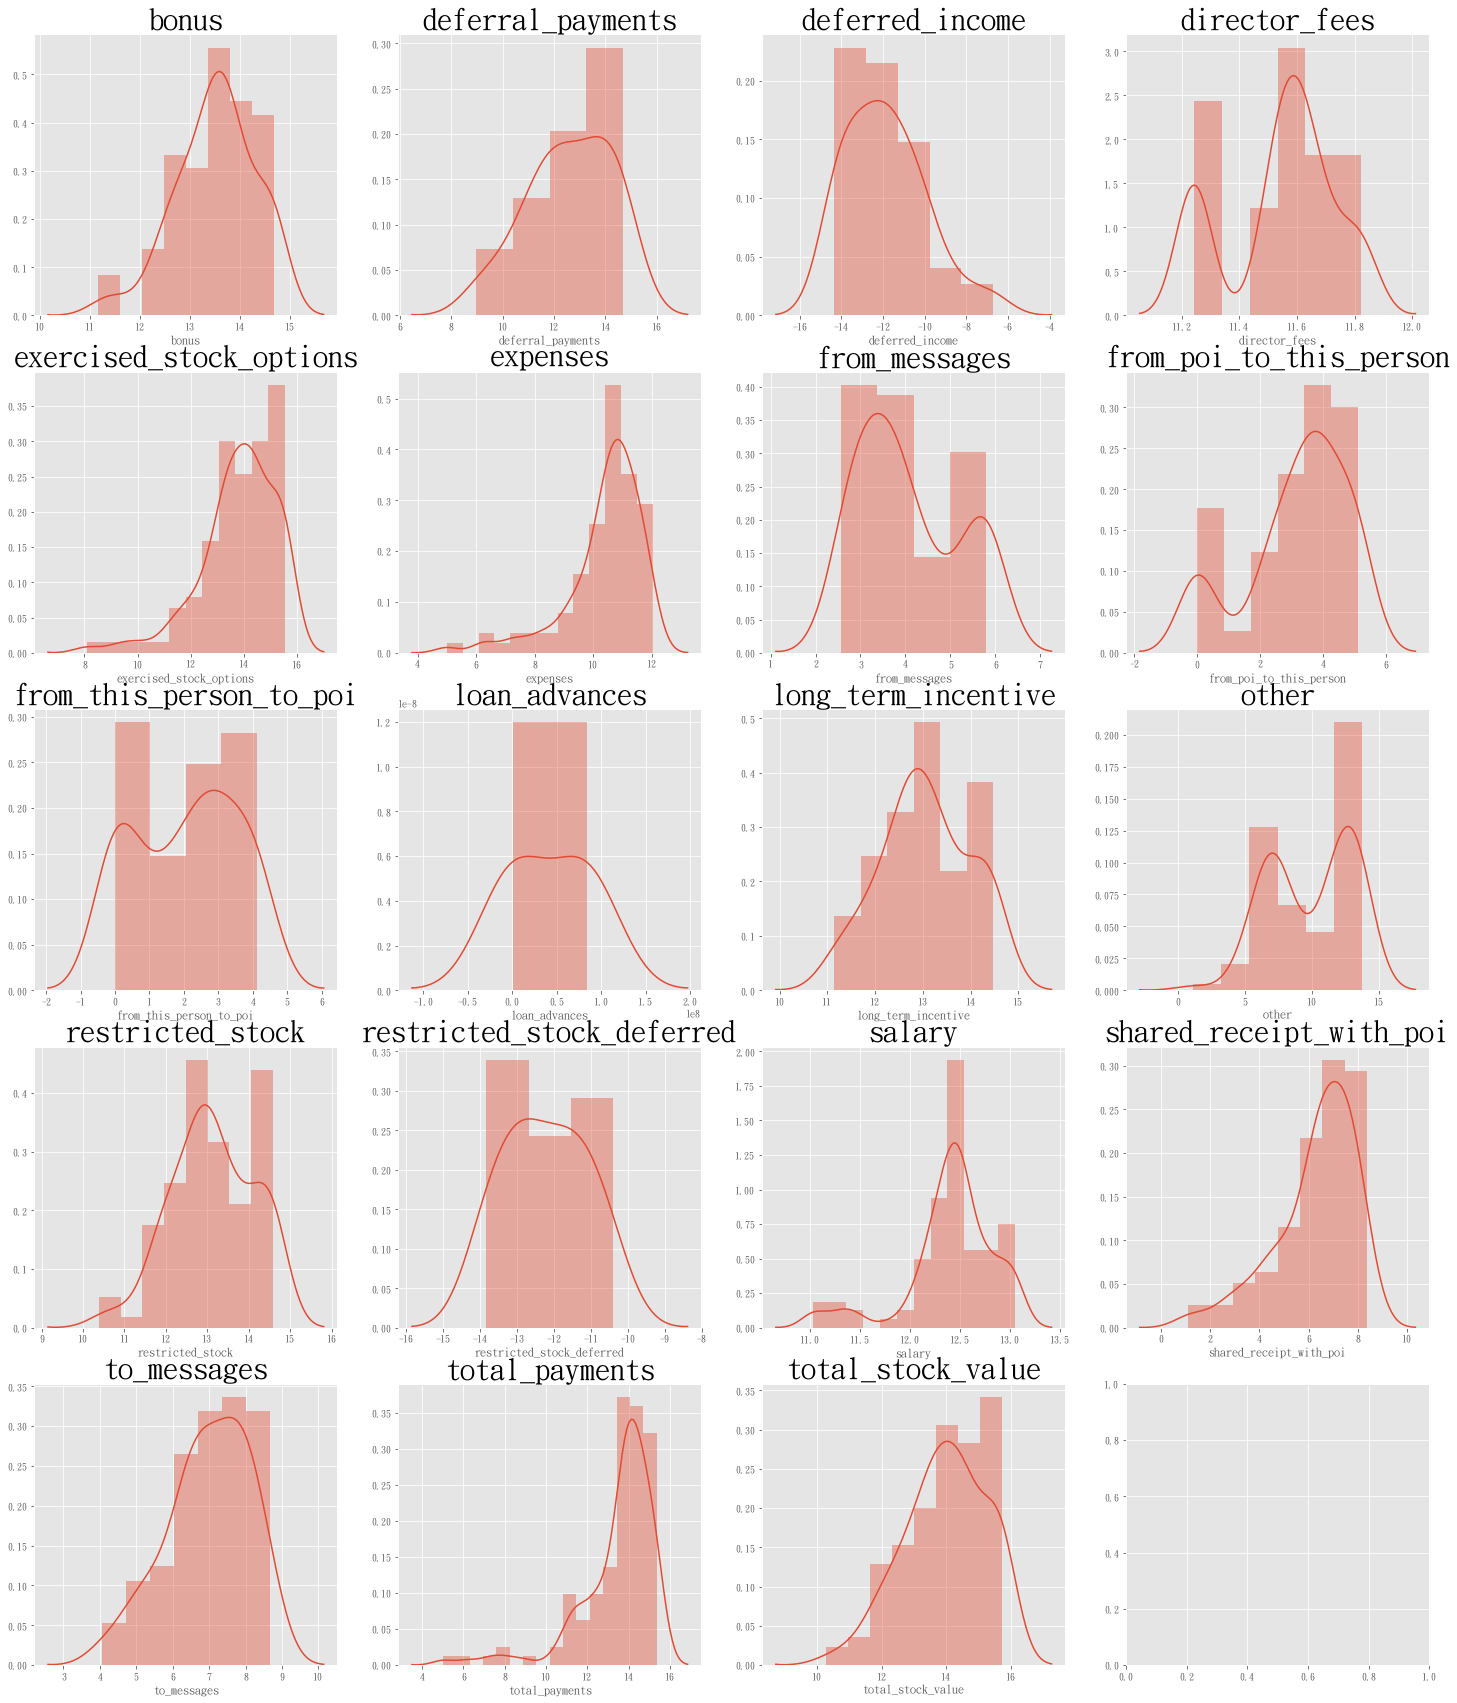

In [9]:
# 觀察修改後的特徵值
f, ax = plt.subplots(5,4, figsize=(25, 30))
sns.distplot(X['bonus'].dropna(), ax = ax[0, 0]).set_title('bonus', fontsize = 30)
sns.distplot(X['deferral_payments'].dropna(), ax = ax[0, 1])
sns.distplot(X['deferred_income'].dropna(), ax = ax[0, 2])
sns.distplot(X['director_fees'].dropna(), ax = ax[0, 3])
sns.distplot(X['exercised_stock_options'].dropna(), ax = ax[1, 0])
sns.distplot(X['expenses'].dropna(), ax = ax[1, 1])
sns.distplot(X['from_messages'].dropna(), ax = ax[1, 2])
sns.distplot(X['from_poi_to_this_person'].dropna(), ax = ax[1, 3])
sns.distplot(X['from_this_person_to_poi'].dropna(), ax = ax[2, 0])
sns.distplot(X['loan_advances'].dropna(), ax = ax[2, 1])
sns.distplot(X['long_term_incentive'].dropna(), ax = ax[2, 2])
sns.distplot(X['other'].dropna(), ax = ax[2, 3])
sns.distplot(X['restricted_stock'].dropna(), ax = ax[3, 0])
sns.distplot(X['restricted_stock_deferred'].dropna(), ax = ax[3, 1])
sns.distplot(X['salary'].dropna(), ax = ax[3, 2])
sns.distplot(X['shared_receipt_with_poi'].dropna(), ax = ax[3, 3])
sns.distplot(X['to_messages'].dropna(), ax = ax[4, 0])
sns.distplot(X['total_payments'].dropna(), ax = ax[4, 1])
sns.distplot(X['total_stock_value'].dropna(), ax = ax[4, 2])

ax[0,0].set_title('bonus', fontsize = 30)
ax[0,1].set_title('deferral_payments', fontsize = 30)
ax[0,2].set_title('deferred_income', fontsize = 30)
ax[0,3].set_title('director_fees', fontsize = 30)
ax[1,0].set_title('exercised_stock_options', fontsize = 30)
ax[1,1].set_title('expenses', fontsize = 30)
ax[1,2].set_title('from_messages', fontsize = 30)
ax[1,3].set_title('from_poi_to_this_person', fontsize = 30)
ax[2,0].set_title('from_this_person_to_poi', fontsize = 30)
ax[2,1].set_title('loan_advances', fontsize = 30)
ax[2,2].set_title('long_term_incentive', fontsize = 30)
ax[2,3].set_title('other', fontsize = 30)
ax[3,0].set_title('restricted_stock', fontsize = 30)
ax[3,1].set_title('restricted_stock_deferred', fontsize = 30)
ax[3,2].set_title('salary', fontsize = 30)
ax[3,3].set_title('shared_receipt_with_poi', fontsize = 30)
ax[4,0].set_title('to_messages', fontsize = 30)
ax[4,1].set_title('total_payments', fontsize = 30)
ax[4,2].set_title('total_stock_value', fontsize = 30)

## 2.3. 填補遺漏值

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,14.375127,0.000000,-14.334088,0.0,15.534248,10.756860,2.944439,3.761200,1.609438,0.0,14.296091,12.071627,14.569235,0.0,12.949526,6.762730,6.809039,13.132415,15.707546
1,14.671255,0.000000,0.000000,0.0,15.534248,10.286605,4.691348,4.488636,3.433987,0.0,14.467836,10.004373,14.569235,0.0,13.044552,7.622175,8.196437,15.350537,15.707546
2,12.206078,0.000000,-8.335192,0.0,14.300647,10.038237,3.688879,2.639057,2.708050,0.0,0.000000,13.713941,13.675353,0.0,12.263610,4.521789,5.420535,14.510599,14.729245
3,13.592368,0.000000,0.000000,0.0,0.000000,11.679583,0.000000,3.000000,2.000000,0.0,13.309128,13.713941,13.800430,0.0,12.320766,0.000000,0.000000,14.791056,13.800430
4,14.038655,0.000000,-12.478010,0.0,0.000000,10.486234,4.976734,5.115746,3.258097,0.0,12.835494,6.188264,11.744259,0.0,12.389186,7.691200,7.862882,14.309779,11.744259
5,0.000000,9.236008,0.000000,0.0,15.534248,11.264195,0.000000,1.000000,0.000000,0.0,0.000000,7.957527,0.000000,0.0,0.000000,0.000000,0.000000,11.419647,15.707546
6,0.000000,0.000000,0.000000,0.0,15.534248,10.895776,0.000000,3.000000,2.000000,0.0,0.000000,11.904636,14.569235,0.0,11.972904,0.000000,0.000000,12.794695,15.707546
7,13.997833,10.225970,-11.878006,0.0,0.000000,9.712024,3.713572,5.115746,2.484907,0.0,0.000000,11.530186,13.456322,0.0,12.572599,7.032624,7.472501,14.214518,13.456322
8,14.671255,12.220528,-12.611541,0.0,15.534248,11.511254,3.610918,4.820282,2.833213,81525000.0,14.470336,13.713941,14.569235,0.0,13.044552,7.788212,8.360305,15.350537,15.707546
9,13.304687,0.000000,0.000000,0.0,12.860294,11.743871,2.833213,3.970292,1.945910,0.0,11.170773,12.207616,12.883647,0.0,12.524439,6.774224,6.773080,14.056325,13.565185


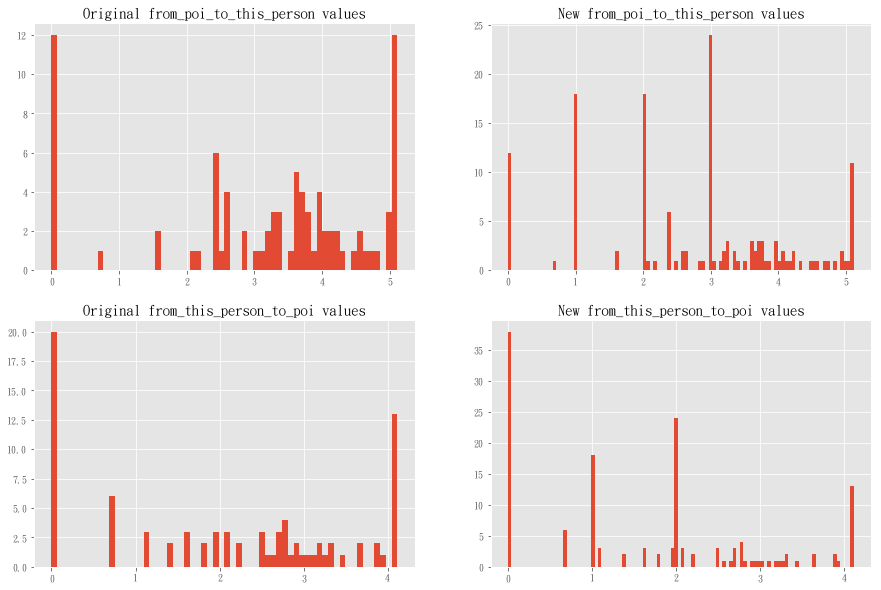

In [10]:
# 由於這些欄位都缺少0這個值，但應該要有，而且遺漏值都不少，因此我猜測缺失值都是0
features_NaN_to_0 = ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 
                     'expenses', 'from_messages', 'loan_advances', 'long_term_incentive', 'other', 
                     'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 
                     'to_messages', 'total_payments', 'total_stock_value']
# 由於'from_poi_to_this_person','from_this_person_to_poi'這兩個和犯罪者通聯次數都有0這個值，
# 直接填補平均值可能會讓母體分布失真，為了讓整體的分布能盡量與原來的數據吻合，這邊以"平均值+-標準差"之間的隨機數值填補遺漏值。
## from_poi_to_this_person
average_from_poi   = X["from_poi_to_this_person"].mean()
std_from_poi       = X["from_poi_to_this_person"].std()
count_nan_from_poi = X["from_poi_to_this_person"].isnull().sum()
rand_from_poi = np.random.RandomState(42).randint(average_from_poi - std_from_poi, average_from_poi + std_from_poi, size = count_nan_from_poi)
## from_this_person_to_poi
average_to_poi   = X["from_this_person_to_poi"].mean()
std_to_poi       = X["from_this_person_to_poi"].std()
count_nan_to_poi = X["from_this_person_to_poi"].isnull().sum()
rand_to_poi = np.random.RandomState(42).randint(average_to_poi - std_to_poi, average_to_poi + std_to_poi, size = count_nan_to_poi)

# 定義繪製和犯罪者通聯次數新舊資料分布圖
fig, ax = plt.subplots(2,2,figsize=(15,10))
## from_poi_to_this_person
ax[0,0].set_title('Original from_poi_to_this_person values')
X['from_poi_to_this_person'].dropna().hist(bins = 60, ax = ax[0,0])
ax[0,1].set_title('New from_poi_to_this_person values')
## from_this_person_to_poi
ax[1,0].set_title('Original from_this_person_to_poi values')
X['from_this_person_to_poi'].dropna().hist(bins = 60, ax = ax[1,0])
ax[1,1].set_title('New from_this_person_to_poi values')

# 填補缺失值
for col in X.columns:
    if col in features_NaN_to_0:
        X[col] = X[col].fillna(0)
    elif col == 'from_poi_to_this_person':
        X.loc[np.isnan(X[col]), col] = rand_from_poi
        X[col].hist(bins = 100, ax = ax[0,1])
    elif col == 'from_this_person_to_poi':
        X.loc[np.isnan(X[col]), col] = rand_to_poi
        X[col].hist(bins = 100, ax = ax[1,1])
X.head(10)

# 3. 特徵工程
#### 特徵工程是機器學習成功的關鍵，坊間常說「數據和特徵決定了機器學習的上限，而模型和算法只是逼近上限而已」。由此可見，特徵工程在機器學習中占有相當重要的地位。在實際應用當中，通常會把特徵工程看做是一個問題。事實上，特徵工程還包含3個子項目：
>1. 特徵建構: 從原始數據中人工的構建新的特徵，取代原始數據的特徵  
>2. 特徵提取: 將機器學習演算法不能識別的原始數據，轉化為演算法可以識別的特徵  
>3. 特徵選擇: 從所有的特徵中選擇一組最好的特徵集，捨去無關的特徵，保留相關性高的特徵

In [11]:
# 觀察是否為犯罪者在各特徵上之表現差異來給我們一些特徵建構的想法
X_train = X[:train_data.shape[0]]
X_train['poi'] = y_train
X_test = X[train_data.shape[0]:]
X_train_value = X_train.groupby(['poi'])
X_train_value.mean()

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
poi,,,,,,,,,,,,,,,,,,,
False,6.678443,2.896379,-3.102244,1.498317,9.694365,6.072067,2.329011,2.566293,1.520634,4.000000e+03,5.322346,5.340615,9.122245,-1.196535,7.513876,3.384468,3.867226,10.971814,11.599677
True,11.680985,3.381493,-6.560903,0.000000,10.196700,10.882377,2.692698,3.652574,2.379847,6.271154e+06,8.271410,11.156696,12.679226,0.000000,11.626802,4.850726,5.066132,14.062977,14.551421


## 3.1. 特徵建構

In [12]:
# 原先都是分開計算薪資和股票，我想在這邊做一個加總
## 計算薪資、股票兩種財務的總和
X['total_incomes'] = X['total_payments'] + X['total_stock_value']
## 計算延期薪資、延期股票的總和
X['total_deferred'] = X['deferred_income'] + X['restricted_stock_deferred']

# 可能會有不小心或是故意加總錯誤的情況發生，而且是否為犯罪者在兩種金額總和的特徵上有不小的差距，因此我在這邊自己重算一次
## 自算薪資總和
X['total_payments_recount'] = X['deferred_income'] + X['bonus'] + X['deferral_payments'] + X['director_fees'] + X['expenses'] + X['loan_advances'] + X['long_term_incentive'] + X['other'] + X['salary']
## 薪資總和誤差
X['total_payments_error'] = X['total_payments_recount'] - X['total_payments']

## 自算股票總和 
X['total_stock_value_recount'] = X['restricted_stock_deferred'] + X['exercised_stock_options'] + X['restricted_stock']
## 股票總和誤差
X['total_stock_value_error'] = X['total_stock_value_recount'] - X['total_stock_value']

# 同上，由於是否為犯罪者在兩種延期金額的特徵上有不小的差距，因此我想看看是否有在延期金額上故意做假帳的狀況
## 自算兩種延期薪資金額
X['total_payments_without_deferred1'] = X['total_payments'] + X['deferred_income']
X['total_payments_without_deferred2'] = X['bonus'] + X['deferral_payments'] + X['director_fees'] + X['expenses'] + X['loan_advances'] + X['long_term_incentive'] + X['other'] + X['salary']
## 自算兩種延期薪資金額之誤差
X['total_payments_without_deferred_error'] = X['total_payments_without_deferred2'] - X['total_payments_without_deferred1']

## 自算兩種延期股票金額
X['total_stock_value_without_deferred1'] = X['total_stock_value'] + X['restricted_stock_deferred']
X['total_stock_value_without_deferred2'] = X['exercised_stock_options'] + X['restricted_stock']
## 自算兩種延期股票金額之誤差
X['total_stock_value_without_deferred_error'] = X['total_stock_value_without_deferred2'] - X['total_stock_value_without_deferred1']

# 計算email相關的總和
## 與犯罪者有關
X['total_poi_contact'] = X['from_poi_to_this_person'] + X['from_this_person_to_poi']
## 一般通聯記錄
X['total_messages'] = X['from_messages'] + X['to_messages']

# 計算與犯罪者聯絡的密集度佔一般聯絡比例
## 收到郵件之比例
X['from_poi_contact_rate'] = X['from_poi_to_this_person'] / (1.0 + X['from_poi_to_this_person'] + X['from_messages'])
## 季出郵件之比例
X['to_poi_contact_rate'] = X['from_this_person_to_poi'] / (1.0 + X['from_this_person_to_poi'] + X['to_messages'])
## 總和之比例
X['total_poi_contact_rate'] = X['total_poi_contact'] / (1.0 + X['total_poi_contact'] + X['total_messages'])

In [13]:
# 來觀察特徵建構完成後是否為犯罪者在各特徵上之表現差異
X_train = X[:train_data.shape[0]]
X_train['poi'] = y_train
X_test = X[train_data.shape[0]:]
X_train_value = X_train.groupby(['poi'])
X_train_value.mean()

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_incomes,total_deferred,total_payments_recount,total_payments_error,total_stock_value_recount,total_stock_value_error,total_payments_without_deferred1,total_payments_without_deferred2,total_payments_without_deferred_error,total_stock_value_without_deferred1,total_stock_value_without_deferred2,total_stock_value_without_deferred_error,total_poi_contact,total_messages,from_poi_contact_rate,to_poi_contact_rate,total_poi_contact_rate
poi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,6.678443,2.896379,-3.102244,1.498317,9.694365,6.072067,2.329011,2.566293,1.520634,4.000000e+03,5.322346,5.340615,9.122245,-1.196535,7.513876,3.384468,3.867226,10.971814,11.599677,22.571491,-4.298779,4.032220e+03,4.021248e+03,17.620075,6.020398,7.869570,4.035322e+03,4.027452e+03,10.403143,18.816610,8.413467,4.086927,6.196237,0.469507,0.270328,0.453458
True,11.680985,3.381493,-6.560903,0.000000,10.196700,10.882377,2.692698,3.652574,2.379847,6.271154e+06,8.271410,11.156696,12.679226,0.000000,11.626802,4.850726,5.066132,14.062977,14.551421,28.614398,-6.560903,6.271204e+06,6.271190e+06,22.875927,8.324505,7.502073,6.271211e+06,6.271203e+06,14.551421,22.875927,8.324505,6.032421,7.758830,0.528950,0.325368,0.480661


## 3.2. 特徵提取
#### 在特徵建構完成之後，接著要做特徵提取，「特徵提取」的首要任務是將變數從文字轉換成數字，連續數值轉為離散數值，以利統計與導入演算法模型。以下分成兩種類型:

>1. 定性數據: 名目型，類別之間沒有自然順序或是大小
>2. 定量數據: 數值型，通常為連續型，可區分大小(本次特徵皆為此類)

In [14]:
features = ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 
            'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 
            'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 
            'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value', 'total_incomes', 
            'total_deferred', 'total_payments_recount', 'total_payments_error', 'total_stock_value_recount', 
            'total_stock_value_error', 'total_payments_without_deferred1', 'total_payments_without_deferred2', 
            'total_payments_without_deferred_error', 'total_stock_value_without_deferred1', 
            'total_stock_value_without_deferred2', 'total_stock_value_without_deferred_error', 'total_poi_contact', 
            'total_messages', 'from_poi_contact_rate', 'to_poi_contact_rate', 'total_poi_contact_rate']
for i in range(X.shape[1]):
    col = features[i]
    feature_cut = col + '_cut'
    Q20 = X[col].quantile(0.20)
    Q40 = X[col].quantile(0.40)
    Q60 = X[col].quantile(0.60)
    Q80 = X[col].quantile(0.80)

    X.loc[X[col] <= Q20, feature_cut] = 1
    X.loc[(X[col] > Q20) & (X[col] <= Q40), feature_cut] = 2
    X.loc[(X[col] > Q40) & (X[col] <= Q60), feature_cut] = 3
    X.loc[(X[col] > Q60) & (X[col] <= Q80), feature_cut] = 4
    X.loc[X[col] > Q80, feature_cut] = 5
        
# 觀察結果前10筆
X.head(10)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_incomes,total_deferred,total_payments_recount,total_payments_error,total_stock_value_recount,total_stock_value_error,total_payments_without_deferred1,total_payments_without_deferred2,total_payments_without_deferred_error,total_stock_value_without_deferred1,total_stock_value_without_deferred2,total_stock_value_without_deferred_error,total_poi_contact,total_messages,from_poi_contact_rate,to_poi_contact_rate,total_poi_contact_rate,bonus_cut,deferral_payments_cut,deferred_income_cut,director_fees_cut,exercised_stock_options_cut,expenses_cut,from_messages_cut,from_poi_to_this_person_cut,from_this_person_to_poi_cut,loan_advances_cut,long_term_incentive_cut,other_cut,restricted_stock_cut,restricted_stock_deferred_cut,salary_cut,shared_receipt_with_poi_cut,to_messages_cut,total_payments_cut,total_stock_value_cut,total_incomes_cut,total_deferred_cut,total_payments_recount_cut,total_payments_error_cut,total_stock_value_recount_cut,total_stock_value_error_cut,total_payments_without_deferred1_cut,total_payments_without_deferred2_cut,total_payments_without_deferred_error_cut,total_stock_value_without_deferred1_cut,total_stock_value_without_deferred2_cut,total_stock_value_without_deferred_error_cut,total_poi_contact_cut,total_messages_cut,from_poi_contact_rate_cut,to_poi_contact_rate_cut,total_poi_contact_rate_cut
0,14.375127,0.000000,-14.334088,0.0,15.534248,10.756860,2.944439,3.761200,1.609438,0.0,14.296091,12.071627,14.569235,0.0,12.949526,6.762730,6.809039,13.132415,15.707546,28.839960,-14.334088,5.011514e+01,3.698273e+01,30.103482,14.395937,-1.201674,6.444923e+01,6.565090e+01,15.707546,30.103482,14.395937,5.370638,9.753478,0.488110,0.170881,0.333081,5.0,1.0,1.0,1.0,5.0,4.0,3.0,4.0,3.0,1.0,5.0,4.0,5.0,1.0,5.0,4.0,4.0,2.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,2.0,2.0
1,14.671255,0.000000,0.000000,0.0,15.534248,10.286605,4.691348,4.488636,3.433987,0.0,14.467836,10.004373,14.569235,0.0,13.044552,7.622175,8.196437,15.350537,15.707546,31.058082,0.000000,6.247462e+01,4.712408e+01,30.103482,14.395937,15.350537,6.247462e+01,4.712408e+01,15.707546,30.103482,14.395937,7.922624,12.887785,0.440928,0.271882,0.363250,5.0,1.0,2.0,1.0,5.0,3.0,5.0,5.0,5.0,1.0,5.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,2.0
2,12.206078,0.000000,-8.335192,0.0,14.300647,10.038237,3.688879,2.639057,2.708050,0.0,0.000000,13.713941,13.675353,0.0,12.263610,4.521789,5.420535,14.510599,14.729245,29.239844,-8.335192,3.988667e+01,2.537608e+01,27.976000,13.246755,6.175407,4.822187e+01,4.204646e+01,14.729245,27.976000,13.246755,5.347108,9.109414,0.360136,0.296656,0.345945,3.0,1.0,2.0,1.0,4.0,3.0,4.0,3.0,4.0,1.0,1.0,5.0,4.0,1.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,3.0,3.0,5.0,5.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,1.0,3.0,2.0
3,13.592368,0.000000,0.000000,0.0,0.000000,11.679583,0.000000,3.000000,2.000000,0.0,13.309128,13.713941,13.800430,0.0,12.320766,0.000000,0.000000,14.791056,13.800430,28.591486,0.000000,6.461579e+01,4.982473e+01,13.800430,0.000000,14.791056,6.461579e+01,4.982473e+01,13.800430,13.800430,0.000000,5.000000,0.000000,0.750000,0.666667,0.833333,4.0,1.0,2.0,1.0,1.0,5.0,1.0,3.0,3.0,1.0,5.0,5.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,4.0,2.0,5.0,5.0,2.0,1.0,5.0,5.0,4.0,3.0,2.0,1.0,3.0,1.0,5.0,5.0,5.0
4,14.038655,0.000000,-12.478010,0.0,0.000000,10.486234,4.976734,5.115746,3.258097,0.0,12.835494,6.188264,11.744259,0.0,12.389186,7.691200,7.862882,14.309779,11.744259,26.054038,-12.478010,4.345982e+01,2.915004e+01,11.744259,0.000000,1.831768,5.593783e+01,5.410606e+01,11.744259,11.744259,0.000000,8.373842,12.839616,0.461190,0.268798,0.376972,5.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,1.0,4.0,3.0,2.0,1.0,4.0,5.0,5.0,4.

## 3.3. 特徵選擇
#### 使用相關性作圖(Pearson相關係數)，下圖中顏色較淺的部分為沒有關係的，顏色偏藍就是正相關，顏色偏紅就是負相關，而我們在意的是與poi有相關性無論正負，若是值越接近0，即是要被剃除的特徵。

In [15]:
# 先將前面轉換為cut的特徵都刪去
for col in X.columns:
    if col in features:
        X = X.drop([col], axis = 1)
        
# 觀察結果前10筆
print(f'X shape: {X.shape}')
X.head(10)

X shape: (146, 36)


,bonus_cut,deferral_payments_cut,deferred_income_cut,director_fees_cut,exercised_stock_options_cut,expenses_cut,from_messages_cut,from_poi_to_this_person_cut,from_this_person_to_poi_cut,loan_advances_cut,long_term_incentive_cut,other_cut,restricted_stock_cut,restricted_stock_deferred_cut,salary_cut,shared_receipt_with_poi_cut,to_messages_cut,total_payments_cut,total_stock_value_cut,total_incomes_cut,total_deferred_cut,total_payments_recount_cut,total_payments_error_cut,total_stock_value_recount_cut,total_stock_value_error_cut,total_payments_without_deferred1_cut,total_payments_without_deferred2_cut,total_payments_without_deferred_error_cut,total_stock_value_without_deferred1_cut,total_stock_value_without_deferred2_cut,total_stock_value_without_deferred_error_cut,total_poi_contact_cut,total_messages_cut,from_poi_contact_rate_cut,to_poi_contact_rate_cut,total_poi_contact_rate_cut
0,5.0,1.0,1.0,1.0,5.0,4.0,3.0,4.0,3.0,1.0,5.0,4.0,5.0,1.0,5.0,4.0,4.0,2.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,2.0,2.0
1,5.0,1.0,2.0,1.0,5.0,3.0,5.0,5.0,5.0,1.0,5.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,2.0
2,3.0,1.0,2.0,1.0,4.0,3.0,4.0,3.0,4.0,1.0,1.0,5.0,4.0,1.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,3.0,3.0,5.0,5.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,1.0,3.0,2.0
3,4.0,1.0,2.0,1.0,1.0,5.0,1.0,3.0,3.0,1.0,5.0,5.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,4.0,2.0,5.0,5.0,2.0,1.0,5.0,5.0,4.0,3.0,2.0,1.0,3.0,1.0,5.0,5.0,5.0
4,5.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,1.0,4.0,3.0,2.0,1.0,4.0,5.0,5.0,4.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,2.0,4.0,5.0,2.0,1.0,1.0,5.0,5.0,3.0,3.0,3.0
5,1.0,4.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0
6,1.0,1.0,2.0,1.0,5.0,4.0,1.0,3.0,3.0,1.0,1.0,4.0,5.0,1.0,3.0,1.0,1.0,2.0,5.0,4.0,2.0,3.0,3.0,5.0,5.0,3.0,2.0,2.0,5.0,5.0,5.0,3.0,1.0,5.0,5.0,5.0
7,5.0,4.0,1.0,1.0,1.0,3.0,4.0,5.0,4.0,1.0,1.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,4.0,5.0,3.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0
8,5.0,5.0,1.0,1.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0
9,4.0,1.0,2.0,1.0,3.0,5.0,3.0,4.0,3.0,1.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,2.0,2.0


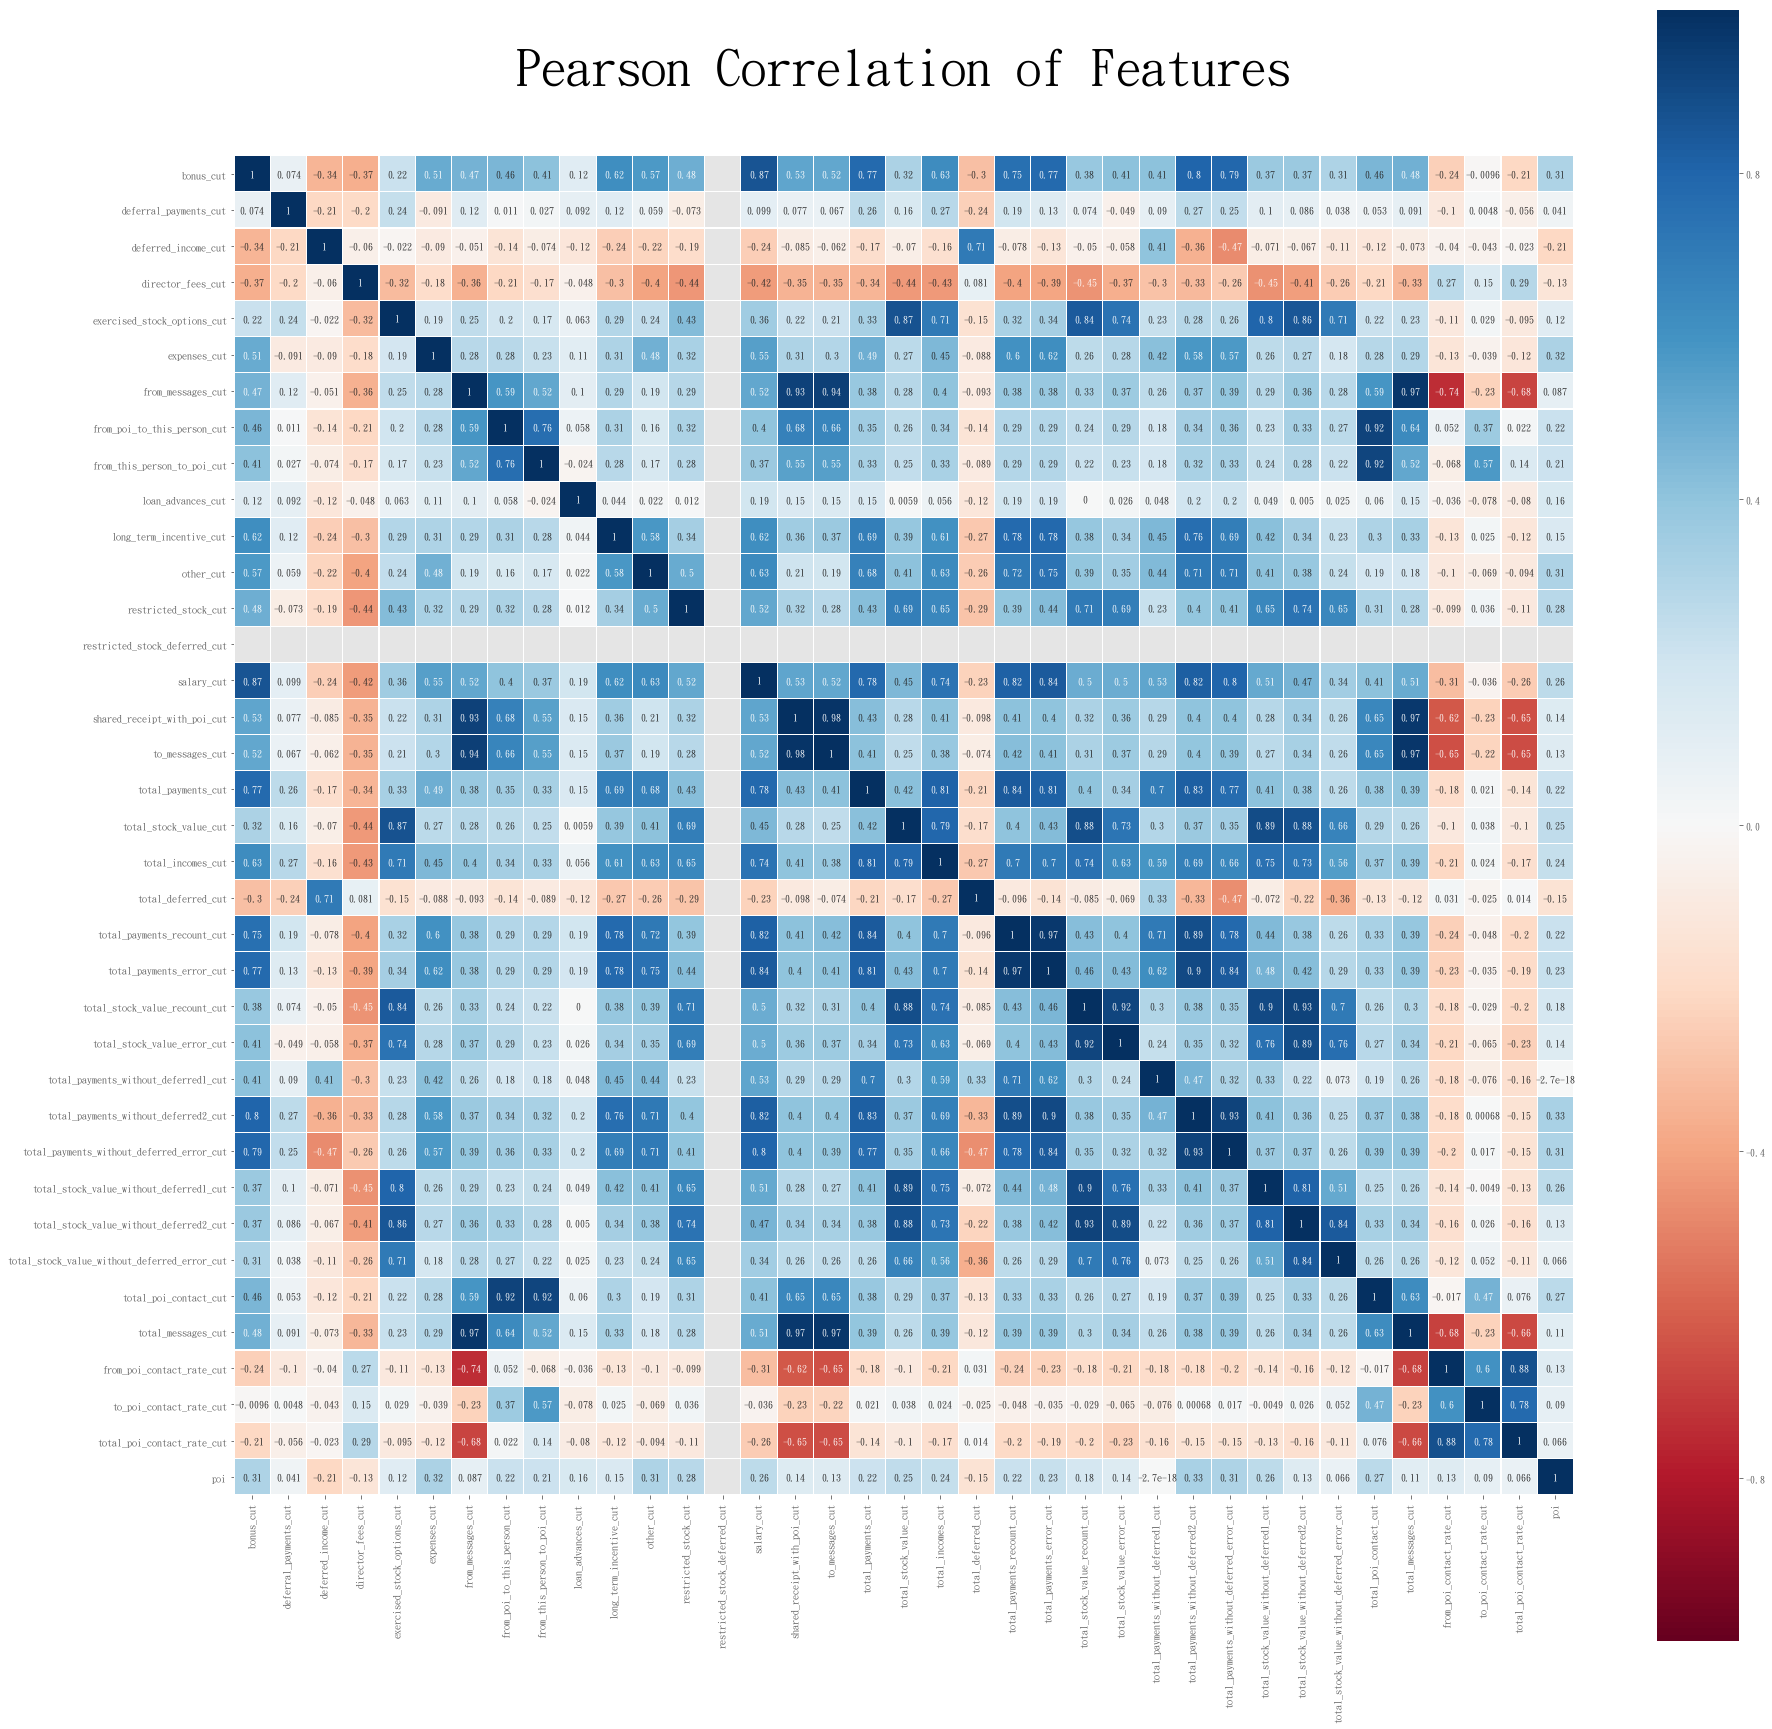

In [16]:
# 因為只有train資料有poi欄位，所以先提出來看相關度
X_train = X[:train_data.shape[0]]
train = pd.concat([X_train, pd.DataFrame(y_train)], axis = 1)

# Pearson相關係數
colormap = plt.cm.RdBu
plt.figure(figsize = (30, 30))
plt.title('Pearson Correlation of Features', y = 1.05, size = 50)
sns.heatmap(train.astype(float).corr(), linewidths = 0.1, vmin = -1.0 ,vmax = 1.0, square = True, cmap = colormap, 
            linecolor = 'white', annot = True, xticklabels = True, yticklabels = True)

In [17]:
# 因為相關性都不高，所以取多點，嘗試相關性絕對值大於0.2之特徵
features_selected = ['bonus_cut', 'deferred_income_cut','expenses_cut', 'from_poi_to_this_person_cut', 
                     'from_this_person_to_poi_cut', 'other_cut', 'restricted_stock_cut', 'salary_cut', 
                     'total_payments_cut', 'total_stock_value_cut', 'total_incomes_cut', 'total_payments_recount_cut', 
                     'total_payments_error_cut', 'total_payments_without_deferred2_cut', 
                     'total_payments_without_deferred_error_cut', 'total_stock_value_without_deferred1_cut', 
                     'total_poi_contact_cut']

# 刪去最不相關的欄位
for col in X.columns:
    if col not in features_selected:
        X = X.drop([col], axis = 1)

# 觀察結果前10筆
print(f'X shape: {X.shape}')
X.head(10)

X shape: (146, 17)


,bonus_cut,deferred_income_cut,expenses_cut,from_poi_to_this_person_cut,from_this_person_to_poi_cut,other_cut,restricted_stock_cut,salary_cut,total_payments_cut,total_stock_value_cut,total_incomes_cut,total_payments_recount_cut,total_payments_error_cut,total_payments_without_deferred2_cut,total_payments_without_deferred_error_cut,total_stock_value_without_deferred1_cut,total_poi_contact_cut
0,5.0,1.0,4.0,4.0,3.0,4.0,5.0,5.0,2.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0
1,5.0,2.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
2,3.0,2.0,3.0,3.0,4.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,4.0,4.0
3,4.0,2.0,5.0,3.0,3.0,5.0,5.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,4.0,3.0,3.0
4,5.0,1.0,4.0,5.0,5.0,3.0,2.0,4.0,4.0,1.0,2.0,3.0,3.0,4.0,5.0,2.0,5.0
5,1.0,2.0,5.0,1.0,1.0,4.0,1.0,1.0,2.0,5.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0
6,1.0,2.0,4.0,3.0,3.0,4.0,5.0,3.0,2.0,5.0,4.0,3.0,3.0,2.0,2.0,5.0,3.0
7,5.0,1.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0
8,5.0,1.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
9,4.0,2.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,5.0,5.0,5.0,4.0,3.0,4.0


# 4. 建立模型

## 4.1. 檔案分割

In [18]:
X_train = X[:train_data.shape[0]]
y_train = np.ravel(y_train)
X_test = X[train_data.shape[0]:]
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (113, 17)
y_train shape: (113,)
X_test shape: (33, 17)


## 4.2. 資料縮放
#### 我試過 StandardScaler 和 MinMaxScaler，MinMaxScaler 較好 

In [19]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_test_mm = mm.transform(X_test)

## 4.3. 訓練模型
#### 我嘗試過KNN, SVC, RF, GB和XGB，XGB最佳

In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost.sklearn import XGBClassifier

# Set parameter1: n_estimators
n_estimators = list(i * 10 for i in range(1, 31))
param_grid_xgbc1 = dict(n_estimators = n_estimators)
cv = StratifiedKFold(10)

# Build model
xgbc1 = XGBClassifier(learning_rate = 0.1, max_depth = 5, min_child_weight = 1, gamma = 0, subsample = 0.8, 
                      colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 3, scale_pos_weight = 1, seed = 42)
xgbc_gecv1 = GridSearchCV(xgbc1, param_grid_xgbc1, scoring = 'roc_auc', cv = cv, n_jobs = 3)
# Train model
xgbc_gecv1.fit(X_train_mm, y_train)
print(f'The best parameters: {xgbc_gecv1.best_params_}\nThe validation score: {xgbc_gecv1.best_score_: .4f}')

D:\Software\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters: {'n_estimators': 140}
The validation score:  0.8885


In [22]:
# Set parameter2: max_depth, min_child_weight
max_depth = list(range(1, 9))
min_child_weight = list(range(1, 9))
param_grid_xgbc2 = dict(max_depth = max_depth, min_child_weight = min_child_weight)
cv = StratifiedKFold(10)

# Build model
xgbc2 = XGBClassifier(learning_rate = 0.1, n_estimators = 140, gamma = 0, subsample = 0.8, colsample_bytree = 0.8, 
                      objective = 'binary:logistic', nthread = 3, scale_pos_weight = 1, seed = 42)
xgbc_gecv2 = GridSearchCV(xgbc2, param_grid_xgbc2, scoring = 'roc_auc', cv = cv, n_jobs = 3)

# Train model
xgbc_gecv2.fit(X_train_mm, y_train)
print(f'The best parameters: {xgbc_gecv2.best_params_}\nThe validation score: {xgbc_gecv2.best_score_: .4f}')

The best parameters: {'max_depth': 2, 'min_child_weight': 1}
The validation score:  0.8938


D:\Software\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
# Set parameter3: gamma
gamma = list(i / 100.0 for i in range(0, 5))
param_grid_xgbc3 = dict(gamma = gamma)
cv = StratifiedKFold(10)

# Build model
xgbc3 = XGBClassifier(learning_rate = 0.1, n_estimators = 140, max_depth = 2, min_child_weight = 1, subsample = 0.8, 
                      colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 3, scale_pos_weight = 1, seed = 42)
xgbc_gecv3 = GridSearchCV(xgbc3, param_grid_xgbc3, scoring = 'roc_auc', cv = cv, n_jobs = 3)

# Train model
xgbc_gecv3.fit(X_train_mm, y_train)
print(f'The best parameters: {xgbc_gecv3.best_params_}\nThe validation score: {xgbc_gecv3.best_score_: .4f}')

The best parameters: {'gamma': 0.02}
The validation score:  0.9035


D:\Software\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
# Set parameter4: subsample, colsample_bytree
subsample = list(i / 100.0 for i in range(50, 105, 5))
colsample_bytree = list(i / 100.0 for i in range(50, 105, 5))
param_grid_xgbc4 = dict(subsample = subsample, colsample_bytree = colsample_bytree)
cv = StratifiedKFold(10)

# Build model
xgbc4 = XGBClassifier(learning_rate = 0.1, n_estimators = 140, max_depth = 2, min_child_weight = 1, gamma = 0.02, 
                      objective = 'binary:logistic', nthread = 3, scale_pos_weight = 1, seed = 42)
xgbc_gecv4 = GridSearchCV(xgbc4, param_grid_xgbc4, scoring = 'roc_auc', cv = cv, n_jobs = 3)

# Train model
xgbc_gecv4.fit(X_train_mm, y_train)
print(f'The best parameters: {xgbc_gecv4.best_params_}\nThe validation score: {xgbc_gecv4.best_score_: .4f}')

The best parameters: {'colsample_bytree': 0.8, 'subsample': 0.85}
The validation score:  0.9195


D:\Software\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
# set parameter5: reg_alpha, reg_lambda again
reg_alpha = [0.0, 0.001, 0.01, 0.1]
reg_lambda = [0.1, 0.5, 1, 5, 10]
param_grid_xgbc5 = dict(reg_alpha = reg_alpha, reg_lambda = reg_lambda)
cv = StratifiedKFold(10)

# Build model
xgbc5 = XGBClassifier(learning_rate = 0.1, n_estimators = 140, max_depth = 2, min_child_weight = 1, gamma = 0.02, 
                      subsample = 0.85, colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 3, 
                      scale_pos_weight = 1, seed = 42)
xgbc_gecv5 = GridSearchCV(xgbc5, param_grid_xgbc5, scoring = 'roc_auc', cv = cv, n_jobs = 3)

# Train model
xgbc_gecv5.fit(X_train_mm, y_train)
print(f'The best parameters: {xgbc_gecv5.best_params_}\nThe validation score: {xgbc_gecv5.best_score_: .4f}')

The best parameters: {'reg_alpha': 0.0, 'reg_lambda': 1}
The validation score:  0.9195


D:\Software\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
# set parameter5: reg_alpha, reg_lambda again
reg_alpha = [0.0, 0.001, 0.01]
reg_lambda = [0.5, 1, 2, 3, 5]
param_grid_xgbc5 = dict(reg_alpha = reg_alpha, reg_lambda = reg_lambda)
cv = StratifiedKFold(10)

# Build model
xgbc5 = XGBClassifier(learning_rate = 0.1, n_estimators = 140, max_depth = 2, min_child_weight = 1, gamma = 0.02, 
                      subsample = 0.85, colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 3, 
                      scale_pos_weight = 1, seed = 42)
xgbc_gecv5 = GridSearchCV(xgbc5, param_grid_xgbc5, scoring = 'roc_auc', cv = cv, n_jobs = 3)

# Train model
xgbc_gecv5.fit(X_train_mm, y_train)
print(f'The best parameters: {xgbc_gecv5.best_params_}\nThe validation score: {xgbc_gecv5.best_score_: .4f}')

The best parameters: {'reg_alpha': 0.0, 'reg_lambda': 1}
The validation score:  0.9195


D:\Software\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
# set parameter6: learning_rate, n_estimators
learning_rate = list(i / 100.0 for i in range(1, 21))
n_estimators = list(i * 10 for i in range(1, 31))
param_grid_xgbc6 = dict(learning_rate = learning_rate, n_estimators = n_estimators)
cv = StratifiedKFold(10)

# Build model
xgbc6 = XGBClassifier(max_depth = 2, min_child_weight = 1, gamma = 0.02, subsample = 0.85, colsample_bytree = 0.8, 
                      reg_alpha = 0.0, reg_lambda = 1, objective = 'binary:logistic', nthread = 3, 
                      scale_pos_weight = 1, seed = 42)
xgbc_gecv6 = GridSearchCV(xgbc6, param_grid_xgbc6, scoring = 'roc_auc', cv = cv, n_jobs = 3)

# Train model
xgbc_gecv6.fit(X_train_mm, y_train)
print(f'The best parameters: {xgbc_gecv6.best_params_}\nThe validation score: {xgbc_gecv6.best_score_: .4f}')

The best parameters: {'learning_rate': 0.08, 'n_estimators': 160}
The validation score:  0.9195


D:\Software\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 4.4. 測試模型並輸出

In [28]:
# Predict mosel
y_pred_xgbc = xgbc_gecv6.predict_proba(X_test_mm)[:, 1]

# save file
df_pred_xgbc = pd.DataFrame(y_pred_xgbc)
df_pred_xgbc.columns = ['poi']
df_pred_xgbc['name'] = test_name
df_pred_xgbc = df_pred_xgbc[['name', 'poi']]
df_pred_xgbc.to_csv('./result/Submission_complex_xgbc_mm.csv', index = False)